# Logistic Regression 

### Import necessary libraries

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

In [79]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### load dataset

In [80]:

df = sns.load_dataset('iris')

### Top 5 records

In [81]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### d-types of data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### how data looks like mathematically

In [83]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### checking missing values

In [84]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### checking duplicate values

In [85]:
df.duplicated().sum()

1

In [86]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Data Analysis

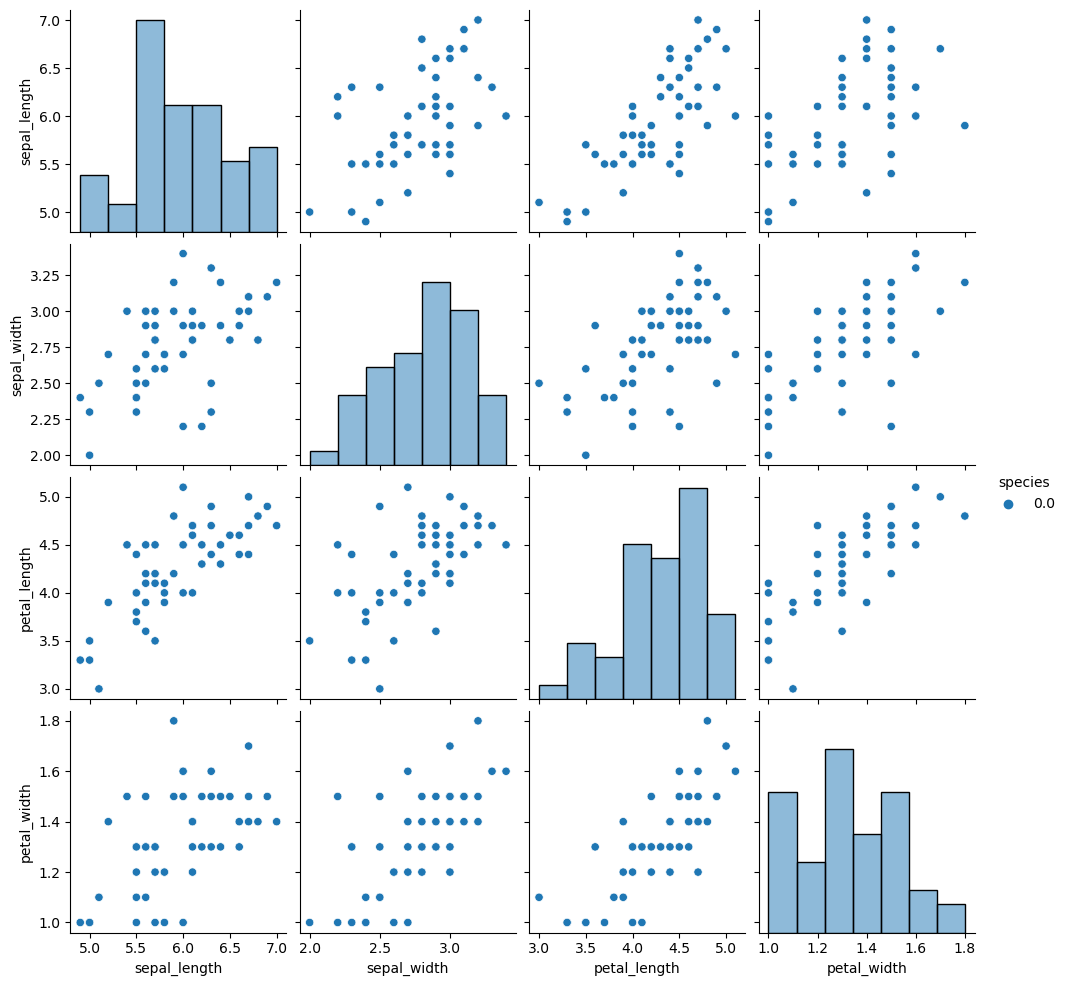

In [77]:
sns.pairplot(df, hue='species' , kind = 'scatter' , diag_kind='hist')

<Axes: ylabel='count'>

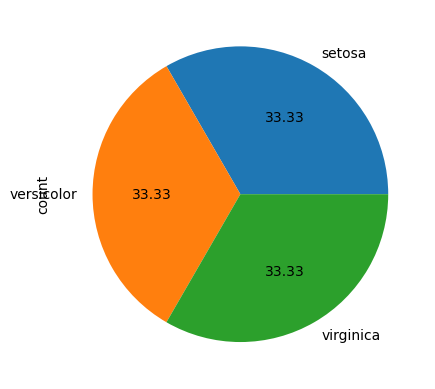

In [88]:
df["species"].value_counts().plot(kind="pie",autopct='%.2f')

## Data Prprocessing

In [90]:
#Species Label Encoding
LE = LabelEncoder()
df['species'] = LE.fit_transform(df['species'])

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split data into dependent and independent variable

In [92]:
X = df.drop('species',axis=1)
y = df.species

In [93]:
# Independent variable
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [94]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

## do train test split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [97]:
y_train

4      0
32     0
142    2
85     1
86     1
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 112, dtype: int32

In [98]:
classifier= LogisticRegression()

### find best parameters using grid search cv

In [99]:
param = {'penalty':['l1','l2','elasticnet'],'C':[1,4,5,10,20,30,40,50],'max_iter':[100,200,300]}

### Implement gridsearch cv

In [100]:
classifier_regresser = GridSearchCV(classifier,param_grid=param, scoring="accuracy",cv=5)

In [101]:
classifier_regresser.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 4, 5, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

## To check which parameter is selected 

In [102]:
print(classifier_regresser.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


## to check best accuracy score

In [106]:
print("Model accuracy is :")
print(classifier_regresser.best_score_)

Model accuracy is :
0.9636363636363636


## Prediction

In [105]:
y_pred = classifier_regresser.predict(X_test)

### Accuracy Score

In [108]:
score = accuracy_score(y_pred,y_test)

In [109]:
score

1.0

In [ ]:
classification_report(y_pred,y